# Lab 8: Object recognition with convolutional neural networks
In this lab we consider the [CIFAR dataset](https://www.openml.org/d/40926), but model it using convolutional neural networks instead of linear models.
There is no separate tutorial, but you can find lots of examples in the lecture notebook on convolutional neural networks. If you are very confident, you can also try to solve these exercises using PyTorch instead of TensorFlow.

Tip: You can run these exercises faster on a GPU (but they will also run fine on a CPU). If you do not have a GPU locally, you can upload this notebook to Google Colab. You can enable GPU support at “runtime” -> “change runtime type”.

In [1]:
# Uncomment the next line if you run on Colab to use TensorFlow 2
#%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices("GPU") # Check whether GPUs are available

2021-12-03 23:23:24.528841: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2021-12-03 23:23:24.533774: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 23:23:24.534040: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
# Uncomment the next line if you run on Colab
#!pip install --quiet openml

In [3]:
%matplotlib inline
import openml as oml
import matplotlib.pyplot as plt

In [4]:
# Download CIFAR data. Takes a while the first time.
# This version returns 3x32x32 resolution images. 
# If you feel like it, repeat the exercises with the 96x96x3 resolution version by using ID 41103 
cifar = oml.datasets.get_dataset(40926) 
X, y, _, _ = cifar.get_data(target=cifar.default_target_attribute, dataset_format="array"); 
cifar_classes = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
                 5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

In [5]:
# The dataset (40926) is in a weird 3x32x32 format, we need to reshape and transpose
Xr = X.reshape((len(X),3,32,32)).transpose(0,2,3,1)

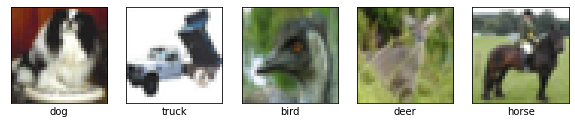

In [6]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,len(Xr))
    # The data is stored in a 3x32x32 format, so we need to transpose it
    axes[i].imshow(Xr[n]/255)
    axes[i].set_xlabel((cifar_classes[int(y[n])]))
    axes[i].set_xticks(()), axes[i].set_yticks(())
plt.show();

## Exercise 1: A simple model
* Split the data into 80% training and 20% validation sets
* Normalize the data to [0,1]
* Build a ConvNet with 3 convolutional layers interspersed with MaxPooling layers, and one dense layer.
    * Use at least 32 3x3 filters in the first layer and ReLU activation.
    * Otherwise, make rational design choices or experiment a bit to see what works.
* You should at least get 60% accuracy.
* For training, you can try batch sizes of 64, and 20-50 epochs, but feel free to explore this as well
* Plot and interpret the learning curves. Is the model overfitting? How could you improve it further?

In [7]:
from sklearn.model_selection import train_test_split

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np

In [8]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(Xr,y, stratify=y, train_size=0.8)

# Normalize data
X_train = X_train / 255.
X_test = X_test / 255.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1,
                    validation_data=(X_test, y_test))

2021-12-03 23:23:26.196661: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-03 23:23:26.197169: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 23:23:26.197409: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-03 23:23:26.197594: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

Epoch 1/50


2021-12-03 23:23:27.788876: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101


250/250 [==============================] - 4s 6ms/step - loss: 1.9320 - accuracy: 0.2963 - val_loss: 1.6934 - val_accuracy: 0.3772
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 1.5741 - accuracy: 0.4336 - val_loss: 1.4332 - val_accuracy: 0.4915
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 1.4134 - accuracy: 0.4933 - val_loss: 1.3412 - val_accuracy: 0.5253
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 1.2977 - accuracy: 0.5374 - val_loss: 1.3198 - val_accuracy: 0.5462
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 1.1981 - accuracy: 0.5726 - val_loss: 1.1634 - val_accuracy: 0.5922
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 1.1078 - accuracy: 0.6122 - val_loss: 1.1408 - val_accuracy: 0.6003
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 1.0270 - accuracy: 0.6382 - val_loss: 1.1268 - val_accuracy: 0.6093
Epoch 8/50
250/25

Max val_acc 0.652999997138977


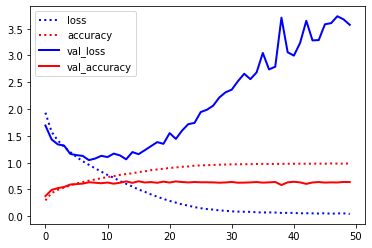

In [9]:
pd.DataFrame(history.history).plot(lw=2,style=["b:","r:","b-","r-"])

print("Max val_acc", np.max(history.history["val_accuracy"]))

## Exercise 2: VGG-like model
* Implement a simplified VGG model by building 3 "blocks" of 2 convolutional layers each
* Do MaxPooling after each block
* The first block should use at least 32 filters, later blocks should use more
* You can use 3x3 filters
* Use zero-padding to be able to build a deeper model (see the `padding` attribute)
* Use a dense layer with at least 128 hidden nodes.
* You can use ReLU activations everywhere (where it makes sense)
* Plot and interpret the learning curves


In [10]:
# Build model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
250/250 [==============================] - 5s 16ms/step - loss: 2.0083 - accuracy: 0.2726 - val_loss: 1.6488 - val_accuracy: 0.4005
Epoch 2/50
250/250 [==============================] - 4s 15ms/step - loss: 1.5818 - accuracy: 0.4283 - val_loss: 1.4177 - val_accuracy: 0.4897
Epoch 3/50
250/250 [==============================] - 3s 14ms/step - loss: 1.3483 - accuracy: 0.5188 - val_loss: 1.3515 - val_accuracy: 0.5207
Epoch 4/50
250/250 [==============================] - 4s 16ms/step - loss: 1.1706 - accuracy: 0.5846 - val_loss: 1.4790 - val_accuracy: 0.4863
Epoch 5/50
250/250 [==============================] - 4s 16ms/step - loss: 1.0133 - accuracy: 0.6404 - val_loss: 1.0655 - val_accuracy: 0.6187
Epoch 6/50
250/250 [==============================] - 4s 16ms/step - loss: 0.8656 - accuracy: 0.6927 - val_loss: 1.0679 - val_accuracy: 0.6177
Epoch 7/50
250/250 [==============================] - 4s 15ms/step - loss: 0.7389 - accuracy: 0.7423 - val_loss: 0.9534 - val_accuracy: 0.6705

Max val_acc 0.6892499923706055


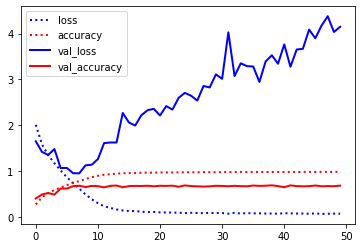

In [11]:
pd.DataFrame(history.history).plot(lw=2,style=["b:","r:","b-","r-"])

print("Max val_acc", np.max(history.history["val_accuracy"]))

## Exercise 3: Regularization
* Explore different ways to regularize your VGG-like model
  * Try adding some dropout after every MaxPooling and Dense layer.
    * What are good Dropout rates? Try a fixed Dropout rate, or increase the rates in the deeper layers.
  * Try batch normalization together with Dropout
    * Think about where batch normalization would make sense 
* Plot and interpret the learning curves


In [12]:
# Build model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
250/250 [==============================] - 6s 20ms/step - loss: 2.0060 - accuracy: 0.3438 - val_loss: 4.1456 - val_accuracy: 0.1098
Epoch 2/50
250/250 [==============================] - 5s 20ms/step - loss: 1.3935 - accuracy: 0.5033 - val_loss: 1.5877 - val_accuracy: 0.4045
Epoch 3/50
250/250 [==============================] - 5s 20ms/step - loss: 1.1495 - accuracy: 0.5927 - val_loss: 1.0166 - val_accuracy: 0.6460
Epoch 4/50
250/250 [==============================] - 5s 20ms/step - loss: 0.9911 - accuracy: 0.6501 - val_loss: 0.9940 - val_accuracy: 0.6525
Epoch 5/50
250/250 [==============================] - 5s 20ms/step - loss: 0.8826 - accuracy: 0.6945 - val_loss: 0.8331 - val_accuracy: 0.7010
Epoch 6/50
250/250 [==============================] - 5s 21ms/step - loss: 0.8176 - accuracy: 0.7181 - val_loss: 0.8755 - val_accuracy: 0.6980
Epoch 7/50
250/250 [==============================] - 5s 20ms/step - loss: 0.7544 - accuracy: 0.7396 - val_loss: 0.8009 - val_accuracy: 0.7172

Max val_acc 0.7994999885559082


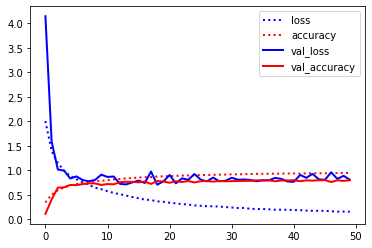

In [13]:
pd.DataFrame(history.history).plot(lw=2,style=["b:","r:","b-","r-"])

print("Max val_acc", np.max(history.history["val_accuracy"]))

## Exercise 4: Data Augmentation
* Perform image augmentation (rotation, shift, shear, zoom, flip,...). You can use the ImageDataGenerator for this.
* What is the effect? What is the effect with and without Dropout?
* Plot and interpret the learning curves


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

In [15]:
train_data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True,)

it_train = train_data_generator.flow(X_train, y_train, batch_size=64)

In [16]:
# Build model
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# Train model
steps = int(X_train.shape[0] / 64)
history = model.fit(it_train, epochs=50, steps_per_epoch=steps, verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
250/250 [==============================] - 8s 25ms/step - loss: 2.1261 - accuracy: 0.3174 - val_loss: 3.9764 - val_accuracy: 0.1688
Epoch 2/50
250/250 [==============================] - 6s 23ms/step - loss: 1.5614 - accuracy: 0.4404 - val_loss: 1.3330 - val_accuracy: 0.5245
Epoch 3/50
250/250 [==============================] - 7s 28ms/step - loss: 1.3252 - accuracy: 0.5248 - val_loss: 1.2626 - val_accuracy: 0.5800
Epoch 4/50
250/250 [==============================] - 6s 25ms/step - loss: 1.1796 - accuracy: 0.5789 - val_loss: 1.2272 - val_accuracy: 0.5863
Epoch 5/50
250/250 [==============================] - 6s 24ms/step - loss: 1.0832 - accuracy: 0.6158 - val_loss: 1.0734 - val_accuracy: 0.6410
Epoch 6/50
250/250 [==============================] - 6s 25ms/step - loss: 1.0062 - accuracy: 0.6494 - val_loss: 1.0162 - val_accuracy: 0.6475
Epoch 7/50
250/250 [==============================] - 7s 29ms/step - loss: 0.9516 - accuracy: 0.6636 - val_loss: 1.0191 - val_accuracy: 0.6672

Max val_acc 0.8262500166893005


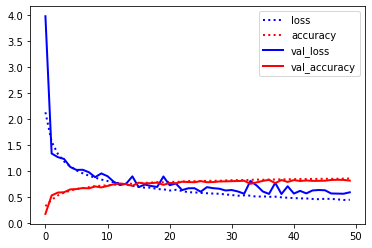

In [17]:
pd.DataFrame(history.history).plot(lw=2,style=["b:","r:","b-","r-"])

print("Max val_acc", np.max(history.history["val_accuracy"]))

## Exercise 5: Interpret the misclassifications
Chances are that even your best model is not yet perfect. It is important to understand what kind of errors it still makes.
* Run the test images through the network and detect all misclassified ones
* Interpret some of the misclassifications. Are these misclassifications to be expected? 
* Compute the confusion matrix. Which classes are often confused?

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
y_test_predictions = model.predict(X_test)
y_test_predictions_incorrect = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_test_predictions, axis=1))[0]

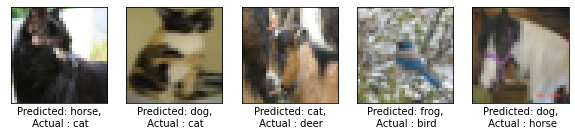

In [20]:
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))

for nr, i in enumerate(y_test_predictions_incorrect[:5]):
    axes[nr].imshow(X_test[i])
    axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (cifar_classes[np.argmax(y_test_predictions[i])],cifar_classes[np.argmax(y_test[i])]))
    axes[nr].set_xticks(()), axes[nr].set_yticks(())

plt.show();

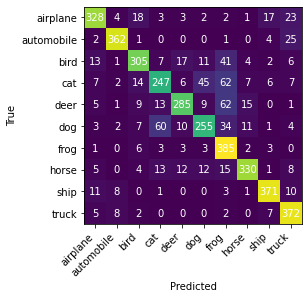

In [21]:
cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_test_predictions, axis=1))
fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(cifar_classes.values()), rotation=45, ha="right")
ax.set_yticklabels(list(cifar_classes.values()))
ax.set_ylabel("True")
ax.set_xlabel("Predicted")

for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")

## Exercise 6: Interpret the model
Retrain your best model on all the data. Next, retrieve and visualize the activations (feature maps) for every filter for every convolutional layer, or at least for a few filters for every layer. Tip: see the course notebooks for examples on how to do this. 

Interpret the results. Is your model indeed learning something useful?

In [22]:
from tensorflow.keras import models

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)       

In [24]:
img_tensor = X_test[4]
img_tensor = np.expand_dims(img_tensor, axis=0) 

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:15]]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Return list of 5 Numpy arrays (one array per layer activation)
activations = activation_model.predict(img_tensor)

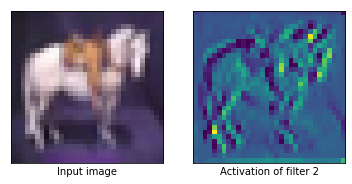

In [25]:
first_layer_activation = activations[0]

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.imshow(img_tensor[0])
ax2.matshow(first_layer_activation[0, :, :, 2], cmap="viridis")
ax1.set_xticks([])
ax1.set_yticks([])
ax2.set_xticks([])
ax2.set_yticks([])
ax1.set_xlabel("Input image")
ax2.set_xlabel("Activation of filter 2");

## Optional: Take it a step further
* Repeat the exercises, but now use a [higher-resolution version of the CIFAR dataset](https://www.openml.org/d/40926) (with OpenML ID 41103), or another [version with 100 classes](https://www.openml.org/d/41983) (with OpenML ID 41983). Good luck!
